<a href="https://colab.research.google.com/github/jjsljhyu/jjsljhyu.github.io/blob/master/binanryClassification_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

# 제공되는 총 단어의 수는 88,585 개임
# label 0: 부정, label 1: 긍정
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)   # 리뷰 단어 개수를 10000개로 제한(발생 빈도가 높은) -> 숫자가 클 수록 복잡? 힘듦

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
print("train data[0] : ", train_data[0])     # 출력되는 숫자는 단어를 숫자로 매핑한 것
print("train labels[0] : ", train_labels[0])   # 0과 1은 각각 부정과 긍정으로 나뉨
print("max index of train data : ", max([max(seq) for seq in train_data]))  # 각각 시퀀스에서 가장 큰 값을 뽑음
print("number of train data : ", train_data.shape)
print("number of test data : ", test_data.shape)

train data[0] :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train labels[0] :  1
max index of train dat

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

#워드 앞의 3개는 예약된 상태: '패딩', '문서시작', '사전에 없음'가 0, 1, 2로 예약됨
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])  # ? -> 사전에 없음

print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)     # 학습 데이터
x_test = vectorize_sequences(test_data)       # 검증 데이터

In [ ]:
print("multi-hot endcoding of train data[0]: ", x_train[0])
print("multi-hot endcoding of test data[0]: ", x_test[0])

multi-hot endcoding of train data[0]:  [0. 1. 1. ... 0. 0. 0.]
multi-hot endcoding of test data[0]:  [0. 1. 1. ... 0. 0. 0.]


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),          # dropout 과집합? 피하기 위해서 씀
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # 0.5보다 크면 적합 0.5보다 크면 부적합?
])

In [ ]:
model.compile(optimizer="rmsprop",      #
              loss="binary_crossentropy",
              metrics=["accuracy"])   # accuracy 0이냐? 1이냐?

In [ ]:
history = model.fit(partial_x_train, # fit함수
                    partial_y_train,
                    epochs=20,       # 20번 활용하여 학습
                    batch_size=32,   # 32번 학습할 때마다
                    validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 11s 10ms/step - loss: 0.3962 - accuracy: 0.8327 - val_loss: 0.2856 - val_accuracy: 0.8856
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2338 - accuracy: 0.9138 - val_loss: 0.2942 - val_accuracy: 0.8875
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1868 - accuracy: 0.9358 - val_loss: 0.3117 - val_accuracy: 0.8846
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1490 - accuracy: 0.9508 - val_loss: 0.3591 - val_accuracy: 0.8827
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1204 - accuracy: 0.9625 - val_loss: 0.4333 - val_accuracy: 0.8812
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1017 - accuracy: 0.9711 - val_loss: 0.4811 - val_accuracy: 0.8805
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0839 - accuracy: 0.9756 - val_loss: 0.5219 - val_accuracy: 0.8780
Epoc

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

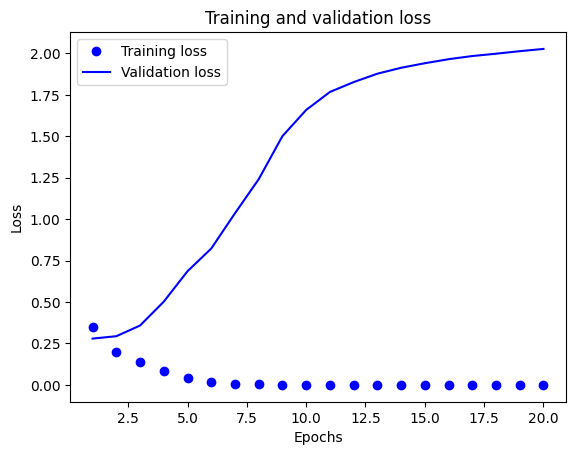

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

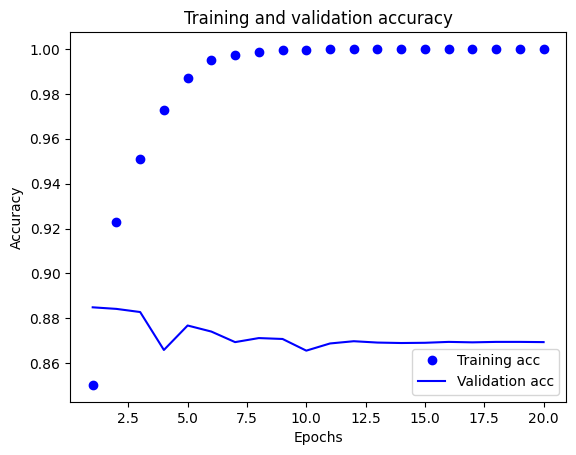

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
predict = model.predict(x_test)
len(predict)

782/782 [==============================] - 2s 3ms/step


25000